In [1]:
import pandas as pd
import numpy as np


In [2]:
import warnings 

warnings.filterwarnings("ignore")

In [3]:
d = pd.read_csv("Swarm_Behaviour.csv")

# Preprocessing

In [3]:
d["Swarm_Behaviour"].value_counts()

0.0    15355
1.0     7954
Name: Swarm_Behaviour, dtype: int64

In [4]:
daz = d[d["Swarm_Behaviour"] == 0.0]
dao = d[d["Swarm_Behaviour"] == 1.0]
r = min(d["Swarm_Behaviour"].value_counts())
daz = daz[:r]

In [5]:
da = pd.concat([dao,daz]).sample(frac = 1)
da.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
10671,1228.09,854.45,-0.32,9.02,-0.04,1.0,0.0,0.0,-0.04,1.0,...,8.87,-0.11,0.99,0.0,0.0,-0.09,1.0,13,3,1.0
11574,-1182.85,242.12,-10.24,-11.98,-1.00,-1.0,0.0,0.0,0.00,0.0,...,-2.98,-1.00,0.00,0.0,0.0,0.00,0.0,23,0,0.0
7297,1136.92,-249.77,5.43,4.98,0.00,0.0,0.0,0.0,0.00,0.0,...,0.69,0.00,0.00,0.0,0.0,0.00,0.0,0,0,0.0
2079,-1344.86,206.53,0.20,9.58,0.08,1.0,0.0,0.0,0.03,1.0,...,9.66,-0.06,1.00,0.0,0.0,-0.06,1.0,1,0,1.0
10852,1392.72,-720.18,-1.09,-7.44,0.00,0.0,0.0,0.0,0.00,0.0,...,-5.70,0.00,0.00,0.0,0.0,0.00,0.0,2,0,0.0


In [6]:
y = da["Swarm_Behaviour"]
da = da.drop("Swarm_Behaviour", axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(da,y,test_size = 0.3,random_state= 4)

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [10]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [11]:
lpred = model.predict(xtest)

## Logistic Regression metrics

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
lecm = confusion_matrix(ytest,lpred)
lecm

array([[2059,  321],
       [ 138, 2255]], dtype=int64)

In [13]:
lecr = classification_report(ytest,lpred)
print(lecr)

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      2380
         1.0       0.88      0.94      0.91      2393

    accuracy                           0.90      4773
   macro avg       0.91      0.90      0.90      4773
weighted avg       0.91      0.90      0.90      4773



# Naive-bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)


GaussianNB()

In [22]:
nbpred = gnb.predict(xtest)

## Naive-Bayes metrics

In [23]:
bncm = confusion_matrix(ytest,nbpred)
bncm

array([[ 455, 1985],
       [ 129, 2204]], dtype=int64)

In [24]:
nbcr = classification_report(ytest,nbpred)
print(nbcr)

              precision    recall  f1-score   support

         0.0       0.78      0.19      0.30      2440
         1.0       0.53      0.94      0.68      2333

    accuracy                           0.56      4773
   macro avg       0.65      0.57      0.49      4773
weighted avg       0.66      0.56      0.48      4773



# KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [26]:
kpred = knn.predict(xtest)

## KNN metrics

In [27]:
kcm = confusion_matrix(ytest,kpred)
kcm

array([[2155,  285],
       [ 169, 2164]], dtype=int64)

In [28]:
kcr = classification_report(ytest,kpred)
print(kcr)

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      2440
         1.0       0.88      0.93      0.91      2333

    accuracy                           0.90      4773
   macro avg       0.91      0.91      0.90      4773
weighted avg       0.91      0.90      0.90      4773



# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
tree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
tpred = tree.predict(xtest)

## Decision Tree(entropy) metrics

In [33]:
tcm = confusion_matrix(ytest,tpred)
tcm

array([[2175,  265],
       [ 330, 2003]], dtype=int64)

In [34]:
tcr = classification_report(ytest,tpred)
print(tcr)

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2440
         1.0       0.88      0.86      0.87      2333

    accuracy                           0.88      4773
   macro avg       0.88      0.87      0.88      4773
weighted avg       0.88      0.88      0.88      4773



# Decision Tree with gini index

In [40]:
gtree= DecisionTreeClassifier(criterion='gini', random_state=0)
gtree.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=0)

In [41]:
gtpred = gtree.predict(xtest)

## Decision Tree(gini) metrics

In [42]:
gtcm = confusion_matrix(ytest,gtpred)
gtcm

array([[2181,  259],
       [ 312, 2021]], dtype=int64)

In [43]:
gtcr = classification_report(ytest,gtpred)
print(gtcr)

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2440
         1.0       0.89      0.87      0.88      2333

    accuracy                           0.88      4773
   macro avg       0.88      0.88      0.88      4773
weighted avg       0.88      0.88      0.88      4773



# Comparing Metrics

In [47]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import precision_score
kf = KFold(n_splits=10)


In [39]:
l_cross = cross_val_score(model,da,y,cv=kf,scoring="f1").mean()

In [50]:
nb_cross = cross_val_score(gnb,da,y,cv=kf,scoring="f1").mean()

In [56]:
knn_cross = cross_val_score(knn,da,y,cv=kf,scoring="f1").mean()

In [52]:
tree_cross = cross_val_score(tree,da,y,cv=kf,scoring="f1").mean()

In [59]:
gtree_cross = cross_val_score(gtree,da,y,cv=kf,scoring="f1").mean()

In [62]:
acc = {"logistic": l_cross , "naive-bayes": nb_cross,"knn": knn_cross,"entropy-tree": tree_cross,"gini-tree": gtree_cross}

In [63]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

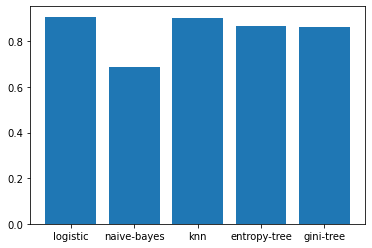

In [72]:
plt.bar(acc.keys() , acc.values(), label = acc.values() )